<h1 align="center"> Losses in Keras </h1>

**Group Members:** **`Kawish`** and **`Haseeb`**

**Course:** **`Deep Learning`**

<h2> Loss Function</h2>

A loss function is a mathematical function that measures the difference between the predicted output of the model and the actual output. The goal of the deep learning model is to minimize this loss function

<h2>Types of Loss Functions</h2>

- **Regression Loss Functions:** typically used in neural networks designed for regression tasks, for example, **`Mean Square Error`**

- **Classification Loss Functions:** used in neural networks designed for classification tasks, for example, **`Cross Entropy`**

<h2> Keras </h2>

Keras is the high-level API of the TensorFlow platform, written in Python. **`Keras`** is simple, flexible and powerful api.

The core data structures of Keras are **layers** and **models**. The simplest type of model is the **`Sequential model`**, a linear stack of layers. For more complex architectures, we should use the Keras **`Functional API`**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

<h2>1 Regression Loss Functions</h2>

<h3> 1.1 Mean Squared Error (MSE) </h3>

It measures the average squared difference between predicted and actual output. MSE is appropriate when the goal is to minimise the overall error in the predictions

<h4 align="center">MSE = (1/n) * Σ(yᵢ - ȳ)² </h4>

- **n** is the number of samples in the dataset

- **yᵢ** is the i-th actual (ground truth) value in the dataset

- **ȳ** is the mean of the actual values in the dataset. **`ȳ = (1/n) * Σ(yᵢ)`**

In [2]:
url = 'https://github.com/kawish14/ML-Project/raw/main/house.csv'
HP = pd.read_csv(url)
HP.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
HP = HP.drop('date',axis=1)
HP = HP.drop('id',axis=1)
HP = HP.drop('zipcode',axis=1)

In [4]:
# Separate features and target
X = HP.drop('price', axis=1)
y = HP['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
print(f'X_train data size {X_train.shape}')
print(f'y_train data size {y_train.shape} \n')

print(f'X_test data size {X_test.shape}')
print(f'y_test data size {y_test.shape} \n')

X_train data size (15129, 17)
y_train data size (15129,) 

X_test data size (6484, 17)
y_test data size (6484,) 



In [7]:
# Define the model for MeanSquareError
mse_model = Sequential([
    Dense(17, activation='relu', input_shape=(17,), kernel_regularizer=regularizers.l2(0.01)),
    Dense(17, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(17, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)
])

#Compile the model optimizer='adam'
mse_model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
mse_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                306       
                                                                 
 dense_1 (Dense)             (None, 17)                306       
                                                                 
 dense_2 (Dense)             (None, 17)                306       
                                                                 
 dense_3 (Dense)             (None, 1)                 18        
                                                                 
Total params: 936 (3.66 KB)
Trainable params: 936 (3.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Early_stopping
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.001, patience=5, restore_best_weights=True)

In [9]:
mse_history = mse_model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/1000
31/31 [==============================] - 1s 7ms/step - loss: 419472506880.0000 - val_loss: 440006148096.0000
Epoch 2/1000
31/31 [==============================] - 0s 2ms/step - loss: 413943857152.0000 - val_loss: 429970882560.0000
Epoch 3/1000
31/31 [==============================] - 0s 2ms/step - loss: 397429309440.0000 - val_loss: 404700856320.0000
Epoch 4/1000
31/31 [==============================] - 0s 2ms/step - loss: 364235030528.0000 - val_loss: 362045440000.0000
Epoch 5/1000
31/31 [==============================] - 0s 2ms/step - loss: 325949095936.0000 - val_loss: 333325500416.0000
Epoch 6/1000
31/31 [==============================] - 0s 2ms/step - loss: 304301146112.0000 - val_loss: 311751770112.0000
Epoch 7/1000
31/31 [==============================] - 0s 2ms/step - loss: 278569844736.0000 - val_loss: 278280994816.0000
Epoch 8/1000
31/31 [==============================] - 0s 2ms/step - loss: 238891483136.0000 - val_loss: 227702194176.0000
Epoch 9/1000
31/31 [====

31/31 [==============================] - 0s 2ms/step - loss: 62301179904.0000 - val_loss: 70421544960.0000
Epoch 69/1000
31/31 [==============================] - 0s 2ms/step - loss: 62297583616.0000 - val_loss: 70347694080.0000
Epoch 70/1000
31/31 [==============================] - 0s 2ms/step - loss: 62133415936.0000 - val_loss: 70267420672.0000
Epoch 71/1000
31/31 [==============================] - 0s 2ms/step - loss: 62037872640.0000 - val_loss: 70078038016.0000
Epoch 72/1000
31/31 [==============================] - 0s 2ms/step - loss: 62130651136.0000 - val_loss: 69971279872.0000
Epoch 73/1000
31/31 [==============================] - 0s 2ms/step - loss: 62045609984.0000 - val_loss: 70015787008.0000
Epoch 74/1000
31/31 [==============================] - 0s 2ms/step - loss: 61842137088.0000 - val_loss: 69944303616.0000
Epoch 75/1000
31/31 [==============================] - 0s 2ms/step - loss: 61805490176.0000 - val_loss: 69892136960.0000
Epoch 76/1000
31/31 [=========================

31/31 [==============================] - 0s 2ms/step - loss: 58945372160.0000 - val_loss: 67021709312.0000
Epoch 136/1000
31/31 [==============================] - 0s 2ms/step - loss: 58970394624.0000 - val_loss: 66931036160.0000
Epoch 137/1000
31/31 [==============================] - 0s 2ms/step - loss: 58631843840.0000 - val_loss: 67456385024.0000
Epoch 138/1000
31/31 [==============================] - 0s 2ms/step - loss: 58739404800.0000 - val_loss: 66703503360.0000
Epoch 139/1000
31/31 [==============================] - 0s 2ms/step - loss: 58508890112.0000 - val_loss: 66656149504.0000
Epoch 140/1000
31/31 [==============================] - 0s 2ms/step - loss: 58405236736.0000 - val_loss: 66562293760.0000
Epoch 141/1000
31/31 [==============================] - 0s 2ms/step - loss: 58272182272.0000 - val_loss: 66213646336.0000
Epoch 142/1000
31/31 [==============================] - 0s 2ms/step - loss: 58262724608.0000 - val_loss: 66362298368.0000
Epoch 143/1000
31/31 [=================

31/31 [==============================] - 0s 2ms/step - loss: 53321715712.0000 - val_loss: 60974452736.0000
Epoch 203/1000
31/31 [==============================] - 0s 2ms/step - loss: 53004181504.0000 - val_loss: 61081997312.0000
Epoch 204/1000
31/31 [==============================] - 0s 2ms/step - loss: 52933132288.0000 - val_loss: 60967878656.0000
Epoch 205/1000
31/31 [==============================] - 0s 2ms/step - loss: 52935995392.0000 - val_loss: 60883443712.0000
Epoch 206/1000
31/31 [==============================] - 0s 2ms/step - loss: 52892332032.0000 - val_loss: 61071507456.0000
Epoch 207/1000
31/31 [==============================] - 0s 2ms/step - loss: 52844949504.0000 - val_loss: 61170040832.0000
Epoch 208/1000
31/31 [==============================] - 0s 2ms/step - loss: 52920766464.0000 - val_loss: 60703858688.0000
Epoch 209/1000
31/31 [==============================] - 0s 2ms/step - loss: 52786561024.0000 - val_loss: 60825731072.0000
Epoch 210/1000
31/31 [=================

Best Training Loss: 51992133632.0
Best Validation Loss: 60001497088.0


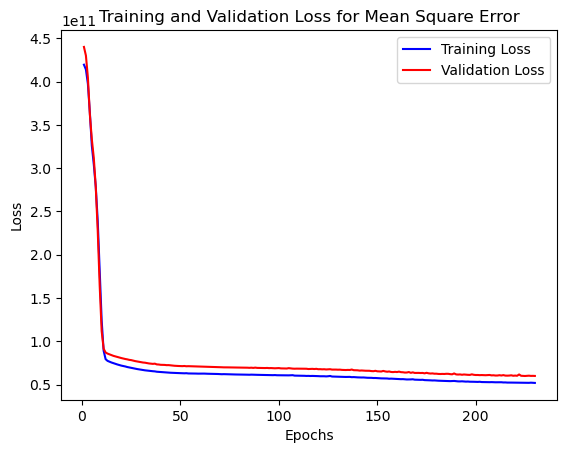

In [10]:
mse_train_loss = mse_history.history['loss']
mse_val_loss = mse_history.history['val_loss']

# Plot the training and validation loss
mse_epochs = range(1, len(mse_train_loss) + 1)

best_train_loss = min(mse_train_loss)
best_val_loss = min(mse_val_loss)

print(f"Best Training Loss: {best_train_loss}")
print(f"Best Validation Loss: {best_val_loss}")

plt.plot(mse_epochs, mse_train_loss, 'b-', label='Training Loss')
plt.plot(mse_epochs, mse_val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Mean Square Error')
plt.legend()
plt.show()

<h3> 1.2 Mean Absolute Error (MAE) </h3>

It measures the average absolute difference between the predicted output and the actual output.
MAE is **less sensitive to outliers** than MSE, making it a good choice when the data contains many outliers.

<h4 align="center">MAE = (1/n) * Σ|yᵢ - ȳ|</h4>

- **n** is the number of samples in the dataset

- **yᵢ** is the i-th actual (ground truth) value in the dataset

- **ȳ** is the mean of the actual values in the dataset. **`ȳ = (1/n) * Σ(yᵢ)`**

In [11]:
# Define the model for MeanSquareError
mae_model = Sequential([
    Dense(17, activation='relu', input_shape=(17,), kernel_regularizer=regularizers.l1(0.01)),
    Dense(17, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dense(17, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dense(1)
])

# Compile the model optimizer='adam'
mae_model.compile(optimizer='adam', loss='mean_absolute_error')

# Print the model summary
mae_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                306       
                                                                 
 dense_5 (Dense)             (None, 17)                306       
                                                                 
 dense_6 (Dense)             (None, 17)                306       
                                                                 
 dense_7 (Dense)             (None, 1)                 18        
                                                                 
Total params: 936 (3.66 KB)
Trainable params: 936 (3.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
mae_history = mae_model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/1000
31/31 [==============================] - 1s 6ms/step - loss: 536822.6875 - val_loss: 543139.2500
Epoch 2/1000
31/31 [==============================] - 0s 2ms/step - loss: 531580.3750 - val_loss: 532990.3125
Epoch 3/1000
31/31 [==============================] - 0s 2ms/step - loss: 512008.9375 - val_loss: 501000.7500
Epoch 4/1000
31/31 [==============================] - 0s 3ms/step - loss: 467243.2188 - val_loss: 446700.5000
Epoch 5/1000
31/31 [==============================] - 0s 2ms/step - loss: 411262.8125 - val_loss: 393215.5938
Epoch 6/1000
31/31 [==============================] - 0s 2ms/step - loss: 370542.6250 - val_loss: 361370.5625
Epoch 7/1000
31/31 [==============================] - 0s 2ms/step - loss: 340064.5312 - val_loss: 325376.8438
Epoch 8/1000
31/31 [==============================] - 0s 2ms/step - loss: 294680.1875 - val_loss: 267624.3125
Epoch 9/1000
31/31 [==============================] - 0s 2ms/step - loss: 226824.6094 - val_loss: 197570.9062
Epoch 10/1

Best Training Loss: 157668.09375
Best Validation Loss: 163553.671875


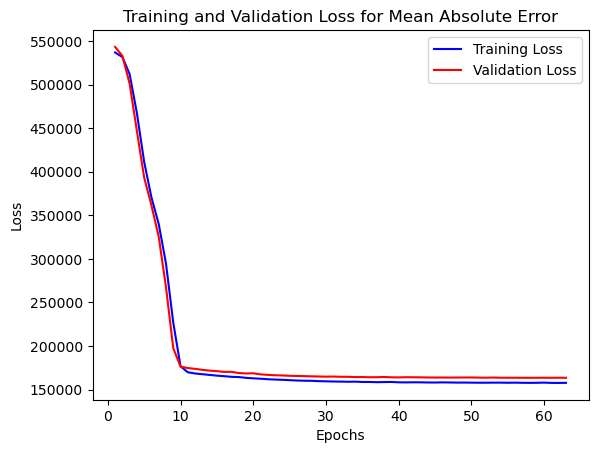

In [13]:
mae_train_loss = mae_history.history['loss']
mae_val_loss = mae_history.history['val_loss']

# Plot the training and validation loss
mae_epochs = range(1, len(mae_train_loss) + 1)

best_train_loss = min(mae_train_loss)
best_val_loss = min(mae_val_loss)

print(f"Best Training Loss: {best_train_loss}")
print(f"Best Validation Loss: {best_val_loss}")

plt.plot(mae_epochs, mae_train_loss, 'b-', label='Training Loss')
plt.plot(mae_epochs, mae_val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Mean Absolute Error')
plt.legend()
plt.show()

<h3> 1.3 Huber Loss </h3>

Huber Loss: Huber loss is a loss function that is a combination of MSE and MAE. It is less sensitive to outliers than MSE while still being differentiable. Huber loss is appropriate when the data contains a moderate number of outliers.

<h4 align="center"> z = δ * |yᵢ - ȳ| - 1/2 * δ² if |yᵢ - ȳ| > δ</h4>

- **yᵢ** is the i-th actual value in the dataset

- **ŷ** is the predicted value

- **δ** is a hyperparameter that controls the threshold for the switch from the L2 to L1 norm.

The 1/2 factor ensures that the function and its derivative are continuous at the threshold.

Huber loss is less sensitive to outliers than Mean Squared Error (MSE) loss because it reduces the influence of outliers by switching to the L1 norm for large differences between predicted and actual values.

In [18]:
# Define the model for MeanSquareError
hb_model = Sequential([
    Dense(17, activation='relu', input_shape=(17,)),
    Dense(17, activation='relu'),
    Dense(17, activation='relu'),
    Dense(1,activation='linear')
])

#Compile the model optimizer='adam'
hb_model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0))

# Print the model summary
hb_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 17)                306       
                                                                 
 dense_9 (Dense)             (None, 17)                306       
                                                                 
 dense_10 (Dense)            (None, 17)                306       
                                                                 
 dense_11 (Dense)            (None, 1)                 18        
                                                                 
Total params: 936 (3.66 KB)
Trainable params: 936 (3.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
hb_history = hb_model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/1000
31/31 [==============================] - 1s 6ms/step - loss: 536450.3750 - val_loss: 543304.4375
Epoch 2/1000
31/31 [==============================] - 0s 2ms/step - loss: 533346.5625 - val_loss: 538705.1250
Epoch 3/1000
31/31 [==============================] - 0s 3ms/step - loss: 525800.6250 - val_loss: 526387.1250
Epoch 4/1000
31/31 [==============================] - 0s 3ms/step - loss: 505900.8125 - val_loss: 496680.9688
Epoch 5/1000
31/31 [==============================] - 0s 2ms/step - loss: 467587.0625 - val_loss: 448139.5938
Epoch 6/1000
31/31 [==============================] - 0s 3ms/step - loss: 412866.8750 - val_loss: 387541.4375
Epoch 7/1000
31/31 [==============================] - 0s 2ms/step - loss: 359082.0938 - val_loss: 346037.0000
Epoch 8/1000
31/31 [==============================] - 0s 2ms/step - loss: 329408.6250 - val_loss: 316559.6250
Epoch 9/1000
31/31 [==============================] - 0s 2ms/step - loss: 294463.7188 - val_loss: 273175.0000
Epoch 10/1

Epoch 75/1000
31/31 [==============================] - 0s 3ms/step - loss: 156727.8438 - val_loss: 162825.3750
Epoch 76/1000
31/31 [==============================] - 0s 2ms/step - loss: 156723.0625 - val_loss: 163365.0469
Epoch 77/1000
31/31 [==============================] - 0s 2ms/step - loss: 156741.8750 - val_loss: 163318.7188
Epoch 78/1000
31/31 [==============================] - 0s 2ms/step - loss: 156847.6094 - val_loss: 162724.1250
Epoch 79/1000
31/31 [==============================] - 0s 3ms/step - loss: 156488.2188 - val_loss: 162787.5625
Epoch 80/1000
31/31 [==============================] - 0s 2ms/step - loss: 156635.4531 - val_loss: 162614.5312
Epoch 81/1000
31/31 [==============================] - 0s 2ms/step - loss: 156605.4375 - val_loss: 162670.1875
Epoch 82/1000
31/31 [==============================] - 0s 2ms/step - loss: 156430.7656 - val_loss: 162453.8750
Epoch 83/1000
31/31 [==============================] - 0s 2ms/step - loss: 156261.1094 - val_loss: 162569.4375
E

Best Training Loss: 153734.5625
Best Validation Loss: 160025.78125


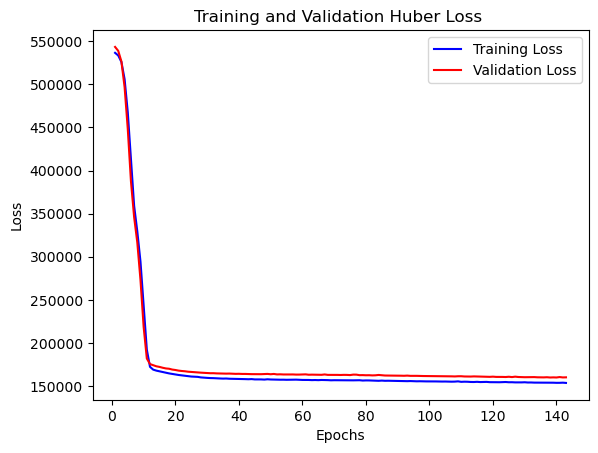

In [20]:
hb_train_loss = hb_history.history['loss']
hb_val_loss = hb_history.history['val_loss']

# Plot the training and validation loss
hb_epochs = range(1, len(hb_train_loss) + 1)

best_train_loss = min(hb_train_loss)
best_val_loss = min(hb_val_loss)

print(f"Best Training Loss: {best_train_loss}")
print(f"Best Validation Loss: {best_val_loss}")

plt.plot(hb_epochs, hb_train_loss, 'b-', label='Training Loss')
plt.plot(hb_epochs, hb_val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Huber Loss ')
plt.legend()
plt.show()

<h2> 2 Classification Loss Functions</h2>

<h3> 2.1 Binary Cross-Entropy (BCE) </h3>

It measures the difference between the predicted and actual output when the output is binary (e.g., 0 or 1). BCE is appropriate when the goal is to optimize the algorithm to classify binary data correctly

<h4 align="center">BCE = - (1/n) * Σ[yᵢ * log(ŷᵢ) + (1 - yᵢ) * log(1 - ŷᵢ)]</h4>

- **n** is the number of samples in the dataset

- **yᵢ** is the i-th actual binary label in the dataset, where yᵢ = 0 or 1.

- **ŷᵢ** is the predicted probability for the i-th sample belonging to the positive class, ranging from 0 to 1.

- **log** represents the natural logarithm.

In [189]:
url = 'https://github.com/kawish14/ML-Project/raw/main/data.csv'
data = pd.read_csv(url)
data.head()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [190]:
df = data.copy()
df['Class'] = df['Class'].map({'good':0, 'bad':1})

In [191]:
train, test= train_test_split(df, test_size = 0.3, random_state = 42) # 30% test set

In [204]:
X_train = train.drop("Class", axis = 1) # drop target from x train
y_train = train["Class"] 

X_test = test.drop("Class", axis = 1) # drop target from x test
y_test = test["Class"]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (245, 33)
y_train shape: (245,)
X_test shape: (106, 33)
y_test shape: (106,)


In [205]:
# Define the model
bce_model = Sequential([
    Dense(64, activation='relu', input_shape=(33,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

# Compile the model optimizer='adam'
bce_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
bce_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 64)                2176      
                                                                 
 dense_93 (Dense)            (None, 32)                2080      
                                                                 
 dense_94 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [206]:
# Train the model
bce_history = bce_model.fit(X_train, y_train, epochs=1000, batch_size=300, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/1000
1/1 [==============================] - 1s 796ms/step - loss: 0.7817 - accuracy: 0.3551 - val_loss: 0.7511 - val_accuracy: 0.3679
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7531 - accuracy: 0.3551 - val_loss: 0.7251 - val_accuracy: 0.3679
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7270 - accuracy: 0.3592 - val_loss: 0.7016 - val_accuracy: 0.3585
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7029 - accuracy: 0.3592 - val_loss: 0.6801 - val_accuracy: 0.4057
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6811 - accuracy: 0.4041 - val_loss: 0.6607 - val_accuracy: 0.5566
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6612 - accuracy: 0.5429 - val_loss: 0.6428 - val_accuracy: 0.6415
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6430 - accuracy: 0.6694 - val_loss: 0.6262 - val_accuracy: 0.7358
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2172 - accuracy: 0.9429 - val_loss: 0.2158 - val_accuracy: 0.9340
Epoch 60/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2127 - accuracy: 0.9429 - val_loss: 0.2116 - val_accuracy: 0.9340
Epoch 61/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2083 - accuracy: 0.9429 - val_loss: 0.2075 - val_accuracy: 0.9340
Epoch 62/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2041 - accuracy: 0.9429 - val_loss: 0.2035 - val_accuracy: 0.9434
Epoch 63/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1999 - accuracy: 0.9469 - val_loss: 0.1996 - val_accuracy: 0.9434
Epoch 64/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1959 - accuracy: 0.9469 - val_loss: 0.1958 - val_accuracy: 0.9434
Epoch 65/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1920 - accuracy: 0.9510 - val_loss: 0.1921 - val_accuracy: 0.9434
Epoch 

Best Training Loss: 0.07905487716197968
Best Validation Loss: 0.11453068256378174


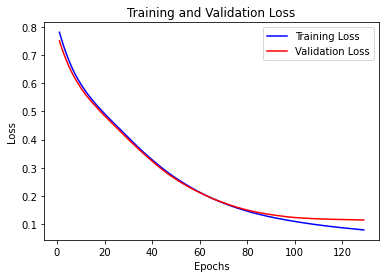

In [207]:
train_loss = bce_history.history['loss']
val_loss = bce_history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

best_train_loss = min(train_loss)
best_val_loss = min(val_loss)

print(f"Best Training Loss: {best_train_loss}")
print(f"Best Validation Loss: {best_val_loss}")

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

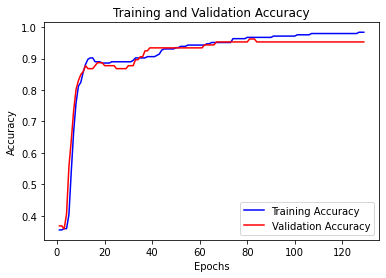

In [208]:
train_accuracy = bce_history.history['accuracy']
val_accuracy = bce_history.history['val_accuracy']

# Plot the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

<h3> 2.2 Hinge Loss </h3>

It measures the difference between the predicted and actual output when the output is binary.
Hinge loss is appropriate when optimising the algorithm to classify data into one of two categories correctly.

The hinge loss penalizes incorrect predictions proportional to the magnitude of their deviation from the correct prediction.

The intuition behind hinge loss is to encourage the model to predict scores that are at least 1 greater than the negative class scores for positive examples and at least 1 less than the positive class scores for negative examples.

<h4 align="center">L(yᵢ, ŷᵢ) = max(0, 1 - yᵢ * ŷᵢ)</h4>

- **y**ᵢ is the i-th actual label in the dataset

- **ŷᵢ** is the predicted label, which is a real-valued score indicating the confidence of the model that sample i belongs to the positive class

- When **yᵢ** **ŷᵢ** is greater than or equal to 1, the loss is 0. Otherwise, the loss is proportional to the distance between the actual and predicted values, with a minimum of 0.

In [209]:
# Define the model
hinge_model = Sequential([
    Dense(64, activation='relu', input_shape=(33,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') 
])

# Compile the model optimizer='adam'
hinge_model.compile(optimizer='sgd', loss=tf.keras.losses.Hinge(), metrics=['accuracy'])

# Print the model summary
hinge_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 64)                2176      
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dense_97 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [210]:
# Train the model
hinge_history = hinge_model.fit(X_train, y_train, epochs=1000, batch_size=300, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/1000
1/1 [==============================] - 1s 797ms/step - loss: 1.3495 - accuracy: 0.3551 - val_loss: 1.3347 - val_accuracy: 0.3302
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3017 - accuracy: 0.3551 - val_loss: 1.2872 - val_accuracy: 0.3491
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.2543 - accuracy: 0.3755 - val_loss: 1.2404 - val_accuracy: 0.3679
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.2070 - accuracy: 0.4082 - val_loss: 1.1935 - val_accuracy: 0.3774
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.1600 - accuracy: 0.4286 - val_loss: 1.1471 - val_accuracy: 0.4151
Epoch 6/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.1138 - accuracy: 0.4694 - val_loss: 1.1012 - val_accuracy: 0.5094
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0688 - accuracy: 0.4939 - val_loss: 1.0562 - val_accuracy: 0.6321
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2147 - accuracy: 0.8694 - val_loss: 0.2493 - val_accuracy: 0.8113
Epoch 60/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2116 - accuracy: 0.8735 - val_loss: 0.2467 - val_accuracy: 0.8113
Epoch 61/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2085 - accuracy: 0.8735 - val_loss: 0.2442 - val_accuracy: 0.8208
Epoch 62/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2056 - accuracy: 0.8735 - val_loss: 0.2420 - val_accuracy: 0.8208
Epoch 63/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2029 - accuracy: 0.8735 - val_loss: 0.2401 - val_accuracy: 0.8208
Epoch 64/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2003 - accuracy: 0.8735 - val_loss: 0.2383 - val_accuracy: 0.8208
Epoch 65/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1978 - accuracy: 0.8735 - val_loss: 0.2365 - val_accuracy: 0.8208
Epoch 

Best Training Loss: 0.05176171660423279
Best Validation Loss: 0.11608046293258667


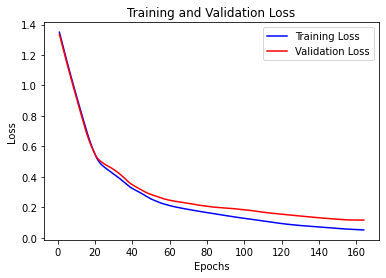

In [213]:
train_loss = hinge_history.history['loss']
val_loss = hinge_history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

best_train_loss = min(train_loss)
best_val_loss = min(val_loss)

print(f"Best Training Loss: {best_train_loss}")
print(f"Best Validation Loss: {best_val_loss}")

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

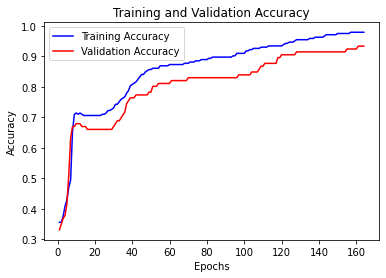

In [212]:
train_accuracy = hinge_history.history['accuracy']
val_accuracy = hinge_history.history['val_accuracy']

# Plot the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

<h3> 2.3 Categorical Cross-Entropy (CCE) </h3>

It measures the difference between the predicted and actual output when the output is categorical (e.g., a classification into one of several categories).

<h4 align="center">CCE = - (1/n) * ΣΣ yᵢⱼ * log(ŷᵢⱼ)</h4>

- **n** is the number of samples in the dataset

- **yᵢⱼ** is the actual label of sample i for class j, where yᵢⱼ = 0 or 1

- **ŷᵢⱼ** is the predicted probability of sample i for class j, where the probabilities for all classes sum up to 1

- **log** represents the natural logarithm.

In [283]:
url = 'https://github.com/kawish14/ML-Project/raw/main/Iris.csv'
data = pd.read_csv(url)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [284]:
unique_classes = data['Species'].unique()
print(unique_classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [285]:
X = data.drop('Species', axis=1)
y = data['Species']

In [286]:
# Label encoding to convert class names to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [287]:
# Convert the labels to one-hot encoded format
y = to_categorical(y)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [289]:
cce_model = Sequential()
cce_model.add(Dense(8, input_dim=4, activation='relu'))
cce_model.add(Dense(3, activation='softmax'))

cce_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [290]:
# Train the model
cce_history = cce_model.fit(X_train, y_train, epochs=1000, batch_size=5,validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/1000
24/24 [==============================] - 1s 8ms/step - loss: 1.4305 - accuracy: 0.3417 - val_loss: 1.3940 - val_accuracy: 0.3000
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 1.1794 - accuracy: 0.3417 - val_loss: 1.1667 - val_accuracy: 0.3000
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 1.0395 - accuracy: 0.4917 - val_loss: 1.0499 - val_accuracy: 0.6000
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.9667 - accuracy: 0.6000 - val_loss: 0.9705 - val_accuracy: 0.6000
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.6000 - val_loss: 0.9144 - val_accuracy: 0.6333
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.6833 - val_loss: 0.8845 - val_accuracy: 0.6667
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.7750 - val_loss: 0.8606 - val_accuracy: 0.7667
Epoch 

24/24 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9667 - val_loss: 0.1686 - val_accuracy: 1.0000
Epoch 116/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9750 - val_loss: 0.1729 - val_accuracy: 0.9667
Epoch 117/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9750 - val_loss: 0.1690 - val_accuracy: 1.0000
Epoch 118/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9583 - val_loss: 0.1651 - val_accuracy: 1.0000
Epoch 119/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9583 - val_loss: 0.1653 - val_accuracy: 1.0000
Epoch 120/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9667 - val_loss: 0.1631 - val_accuracy: 1.0000
Epoch 121/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9750 - val_loss: 0.1620 - val_accuracy: 1.0000
Epoch 1

Epoch 172/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.9750 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 173/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9750 - val_loss: 0.1138 - val_accuracy: 1.0000
Epoch 174/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9750 - val_loss: 0.1204 - val_accuracy: 1.0000
Epoch 175/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9750 - val_loss: 0.1154 - val_accuracy: 1.0000
Epoch 176/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9750 - val_loss: 0.1145 - val_accuracy: 1.0000
Epoch 177/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9750 - val_loss: 0.1142 - val_accuracy: 1.0000
Epoch 178/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9583 - val_loss: 0.1227 - val_accuracy:

Best Training Loss: 0.11617163568735123
Best Validation Loss: 0.113777756690979


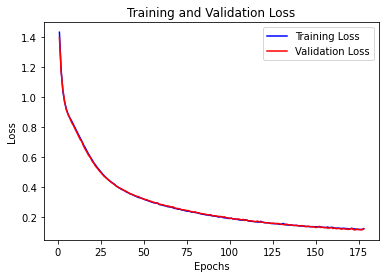

In [291]:
train_loss = cce_history.history['loss']
val_loss = cce_history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

best_train_loss = min(train_loss)
best_val_loss = min(val_loss)

print(f"Best Training Loss: {best_train_loss}")
print(f"Best Validation Loss: {best_val_loss}")

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

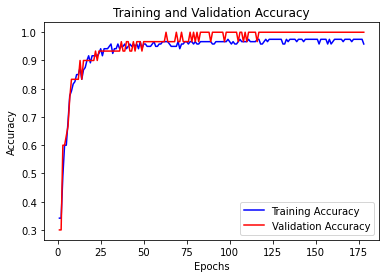

In [292]:
train_accuracy = cce_history.history['accuracy']
val_accuracy = cce_history.history['val_accuracy']

# Plot the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()